In [1]:
from sqlalchemy import create_engine
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from scipy.io import loadmat
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
sns.set_context('notebook')
sns.set_style('white')

In [3]:
df = pd.read_csv("E:\Masters in IT\Importat ML Project\Loan_Prediction_Ai_Project-main\loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
le = LabelEncoder()

o = df["Gender"].mode()
df["Gender"].fillna(o[0], inplace=True)
m = df["Married"].mode()
df["Married"].fillna(m[0], inplace=True)
s = df['Self_Employed'].mode()
df['Self_Employed'].fillna(s[0], inplace=True)
x = df["LoanAmount"].mean()
df["LoanAmount"].fillna(x, inplace=True)
lmt = df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].fillna(lmt, inplace=True)
ch = df["Credit_History"].mode()
df["Credit_History"].fillna(ch[0], inplace=True)
h = df["Dependents"].mode()
df["Dependents"].fillna(h[0], inplace=True)
# print(df.isnull().sum())
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Loan_ID"] = le.fit_transform(df["Loan_ID"])

# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df.dropna(inplace= True)
# df["Gender"]=le.fit_transform(df["Gender"])
# df["Married"]=le.fit_transform(df["Married"])
# df["Education"]=le.fit_transform(df["Education"])
# df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
# df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
# df["Property_Area"]=le.fit_transform(df["Property_Area"])
# df["Dependents"]=le.fit_transform(df["Dependents"])
# df["Loan_ID"]=le.fit_transform(df["Loan_ID"])
# feature_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
# x = df[feature_col]  # feature

In [6]:
x = df.iloc[:, 0:12]
y = df.Loan_Status  # target variable
print('-----------------------')
# drop nulls
df.drop_duplicates()
# spliting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=8)

-----------------------


In [7]:
# train the model using LogisticRegression
# lr=LogisticRegression()
def Logistic_Regression():
    lr = LogisticRegression(solver='lbfgs', max_iter=300)
    # fit the model with data
    lr.fit(x_train, y_train)
    # predict with test dataset
    y_predict_LR = lr.predict(x_test)
    # print(y_predict_LR)
    accuracy_Score_LR = metrics.accuracy_score(y_test, y_predict_LR)
    print("*****************")
    print("Logistic_Regression accuracy :", accuracy_Score_LR)
    # classification_report
    print()
    print("classification_report")
    print(classification_report(y_test, y_predict_LR))
    print("*****************")
    # Feature selection
    sel = SelectFromModel(lr)
    sel.fit(x, y)
    selected_features = sel.transform(x)
    print(sel.get_support())
    print(df.shape)
    print(selected_features.shape)
    #****************************************************
    # Calculating Confusion Matrix
    CM = confusion_matrix(y_test, y_predict_LR)
    print('Confusion Matrix is : \n', CM)

    # drawing confusion matrix
    sns.heatmap(CM, center=True)
    plt.show()
################################################

In [8]:
# train the model using DecisionTree
def DecisionTree():
    model = DecisionTreeClassifier(random_state=0, max_depth=3)
    # fit the model with data
    model.fit(x_train, y_train)
    # x=model.feature_importances_
    # print(x)
    # predict with test dataset
    y_predict_DecisionTree = model.predict(x_test)
    # print(y_predict_DecisionTree)
    accuracy_Score_DecisionTree = metrics.accuracy_score(y_test, y_predict_DecisionTree)
    print("*****************")
    print("DecisionTree accuracy :", accuracy_Score_DecisionTree)
    # classification_report
    print()
    print("classification_report")
    print(classification_report(y_test, y_predict_DecisionTree))
    print("*****************")
    # Feature selection
    sel = SelectFromModel(model)
    sel.fit(x, y)
    selected_features = sel.transform(x)
    print(sel.get_support())
    print(df.shape)
    print(selected_features.shape)

In [9]:
#################################################

def RandomForest():
    models = RandomForestClassifier(
        n_estimators=21, criterion='entropy', random_state=0)
    models.fit(x_train, y_train)
    # importance = models.feature_importances_
    # for i in range (xtrain.shape[]):
    # print (name[i],importance[i])
    # predict with test dataset
    y_predict_random = models.predict(x_test)
    # print(y_predict_DecisionTree)
    accuracy_Score_random = metrics.accuracy_score(
        y_test, y_predict_random)
    print("*****************")
    print("RandomForest accuracy :", accuracy_Score_random)
    # classification_report
    print()
    print("classification_report")
    print(classification_report(y_test, y_predict_random))

In [10]:
# train the model using svm
def supportVectorMachine():
    cl = SVC(kernel='rbf')
    # fit the model with data
    cl.fit(x_train, y_train)
    # predict with test dataset
    y_predict_SVM = cl.predict(x_test)
    # print(y_predict_SVC)
    accuracy_Score_SVM = metrics.accuracy_score(y_test, y_predict_SVM)
    print("*****************")
    print("supportVectorMachine accuracy :", accuracy_Score_SVM)
    # classification_report
    print()
    print("classification_report")
    print(classification_report(y_test, y_predict_SVM))

In [11]:
def NaiveBayes():
    # train the model using NaiveBayes
    gnb = GaussianNB()
    # fit the model with data
    gnb.fit(x_train, y_train)
    # predict with test dataset
    y_predict_NaiveBayes = gnb.predict(x_test)
    # print (y_predict)
    NaiveBayes_Accuracy = metrics.accuracy_score(y_test, y_predict_NaiveBayes)
    print("*****************")
    print("Naive Bayes model accuracy :", NaiveBayes_Accuracy)
    # classification_report
    print()
    print("classification_report")
    print(classification_report(y_test, y_predict_NaiveBayes))

In [12]:
# --------------------------------------------------#
def KNN():
    # Fitting K-NN classifier to the training set
    classifier = KNeighborsClassifier(n_neighbors=40, metric='minkowski', p=2)
    classifier.fit(x_train, y_train)
    # Predicting the test set result
    y_pred_KNN = classifier.predict(x_test)
    KNN_Accuracy = metrics.accuracy_score(y_test, y_pred_KNN)
    print("*****************")
    print("KNN model accuracy :", KNN_Accuracy)
    # classification_report
    print()
    print("classification_report")
    print(classification_report(y_test, y_pred_KNN))

In [13]:
#####################################
def barplot():
    # x = np.random.normal(5.0, 1.0, 1000)
    # y=   np.random.normal(10.0, 2.0, 1000)
    x = df.Dependents
    y = df.Loan_Status

    plt.bar(x, y, width=0.7, color='b')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Bar Plot')
    plt.show()

In [14]:
def standardScaler():
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    columns = ['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    x = df[columns]
    x = scaler.fit_transform(x)
    print("***")
    print('x\n', x[:100])
    print('y\n', y[:60])

In [16]:
# def minmaxscaler():
#     scaler =MinMaxScaler(copy=True,feature_range=(0,1))
#     columns = ['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
#     x = df[columns]
#     x=scaler.fit_transform(x)
#     print("***")
#     print('x\n',x[:100])
#     print('y\n',y[:60])

Enter a number to get Accuracy :
1 Logistic_Regression.
2 SVM.
3 ID3.
4 Naive_Bayes.
5 KNN. 
6 RandomForest
7 To Print Accuracy of All Models.
8 To scale your data. 
9 dotplot .
10 Exit.
*****************
Logistic_Regression accuracy : 0.9032258064516129

classification_report
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.94        47

    accuracy                           0.90        62
   macro avg       0.91      0.82      0.85        62
weighted avg       0.90      0.90      0.90        62

*****************
[False False  True False  True False False False False False  True False]
(614, 13)
(614, 3)
Confusion Matrix is : 
 [[10  5]
 [ 1 46]]


c:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


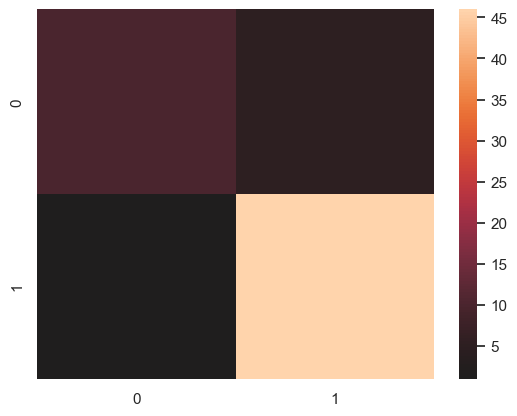

Enter a number to get Accuracy :
1 Logistic_Regression.
2 SVM.
3 ID3.
4 Naive_Bayes.
5 KNN. 
6 RandomForest
7 To Print Accuracy of All Models.
8 To scale your data. 
9 dotplot .
10 Exit.


c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*****************
KNN model accuracy : 0.7580645161290323

classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.76      1.00      0.86        47

    accuracy                           0.76        62
   macro avg       0.38      0.50      0.43        62
weighted avg       0.57      0.76      0.65        62

Enter a number to get Accuracy :
1 Logistic_Regression.
2 SVM.
3 ID3.
4 Naive_Bayes.
5 KNN. 
6 RandomForest
7 To Print Accuracy of All Models.
8 To scale your data. 
9 dotplot .
10 Exit.
*****************
Logistic_Regression accuracy : 0.9032258064516129

classification_report
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.94        47

    accuracy                           0.90        62
   macro avg       0.91      0.82      0.85        62
weighted avg       0.90      0.90      0.9

c:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


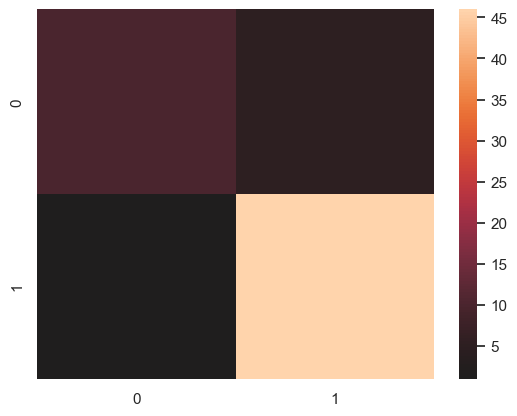

c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

*****************
supportVectorMachine accuracy : 0.7580645161290323

classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.76      1.00      0.86        47

    accuracy                           0.76        62
   macro avg       0.38      0.50      0.43        62
weighted avg       0.57      0.76      0.65        62

*****************
DecisionTree accuracy : 0.9193548387096774

classification_report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        47

    accuracy                           0.92        62
   macro avg       0.95      0.83      0.87        62
weighted avg       0.93      0.92      0.91        62

*****************
[False False False False False False False False False False  True False]
(614, 13)
(614, 1)
*****************
Naive Bayes model accuracy : 0.8870967741

c:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


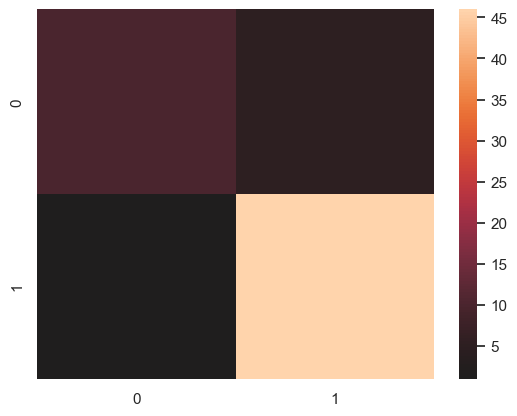

Enter a number to get Accuracy :
1 Logistic_Regression.
2 SVM.
3 ID3.
4 Naive_Bayes.
5 KNN. 
6 RandomForest
7 To Print Accuracy of All Models.
8 To scale your data. 
9 dotplot .
10 Exit.


In [17]:
# functions calling
while True:
    print("Enter a number to get Accuracy :")
    print("1 Logistic_Regression.")
    print("2 SVM.")
    print("3 ID3.")
    print("4 Naive_Bayes.")
    print("5 KNN. ")
    print("6 RandomForest")
    print("7 To Print Accuracy of All Models.")
    print("8 To scale your data. ")
    print("9 dotplot .")
    print("10 Exit.")
    number = input("number = ")
    if int(number) == 1:
        Logistic_Regression()
    elif int(number) == 2:
        supportVectorMachine()
    elif int(number) == 3:
        DecisionTree()
    elif int(number) == 4:
        NaiveBayes()
    elif int(number) == 5:
        KNN()
    elif int(number) == 6:
        RandomForest()
    elif int(number) == 7:
        Logistic_Regression();
        supportVectorMachine()
        DecisionTree();
        NaiveBayes()
        KNN();
        RandomForest()

    elif int(number) == 8:
        standardScaler()  # minmaxscaler()
    elif int(number) == 9:
        barplot()

    elif int(number) == 10:
        break
    else:
        print(" wrong number ")

        # LDA LinearDiscriminantAnalysis
        lda_model = LDA(n_components=1)
        X_train_lda = lda_model.fit_transform(x_train, y_train)
        X_test_lda = lda_model.transform(x_test)
        # print( lda_model.score(x_train, y_train))